# Домашнее задание 6

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_6

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию координатного спуска (смотри семинар). 

Для такого метода подберите шаг $\gamma$ для наилучшей сходимости постройте график сходимости (по оси $y$ - критерий $\| \nabla f(x^k)\|^2$, а по оси $x$ - число арифмитических операций при подсчете "градиента"). Постройте на этом же графике сходимость честного градиентного спуска c наилучшим шагом сходимости. Сделайте вывод о характере сходимости нового метода.

In [1]:
import my_optimization as opt
import numpy as np
from importlib import reload

In [2]:
n_iter = 10000

args = {}
args['L'] = 1000
args['mu'] = 1
args['d'] = 100

args['A'] = opt.gen_A(args['d'], args['mu'], args['L'])
args['b'] = np.random.random_sample(args['d'])
x_0 = np.random.random_sample(args['d'])

CSGD 

$$ \gamma_{th} = \frac{c}{4Ld}, c \in \{1, 300, 500, 600, 700, 800 \}$$

GD
$$\gamma_{th} = \frac{1}{L}$$

Method of calculating the number of operations
- From the function f_quad_grad_j from opt we understand that the number of the number of arithmetic operations is $d$#times of calling f_quad_grad_j
'''

In [3]:
#gamma fitting
def csgd_gamma_th(k, f, grad_f, x_k, x_true, args):
    return args['c']/(4 * args['L'] * args['d'])

def gd_gamma_th(k, f, grad_f, x_k, x_true, args):
    return 1/args['L']

In [4]:
#calculating the number of operations
calls_csgd = n_iter
gd_n_iter = calls_csgd // args['d']

operations_csgd = [i*args['d'] for i in range(n_iter)]
operations_gd = [i*args['d']**2 for i in range(gd_n_iter)]

In [5]:
#optimizing
x, y, label = [], [], []

#csgd optimizing
c_arr = [1, 300, 500, 600, 700, 800]
for args['c'] in c_arr:
    csgd_gamma_theory = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, criterium = '||grad_f(x_k)||', args = args, n_iter = n_iter, gamma_k = csgd_gamma_th, csgd_activate = True, grad_f_j = opt.f_quad_grad_j)

    csgd_points_arr, csgd_differences_arr, csgd_times_arr = csgd_gamma_theory.descent()
    x.append(operations_csgd)
    y.append(csgd_differences_arr)
    label.append(r"CSGD, $\gamma_k = \frac{%i}{4dL}$" % args['c'])
    reload(opt)
    
#gd optimizing
gd_gamma_theory = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, criterium = '||grad_f(x_k)||', 
args = args, n_iter = gd_n_iter, gamma_k = gd_gamma_th)
gd_points_arr, gd_differences_arr, gd_times_arr = gd_gamma_theory.descent()
x.append(operations_gd)
y.append(gd_differences_arr)
label.append(r"GD, $\gamma = \frac{1}{L}$")

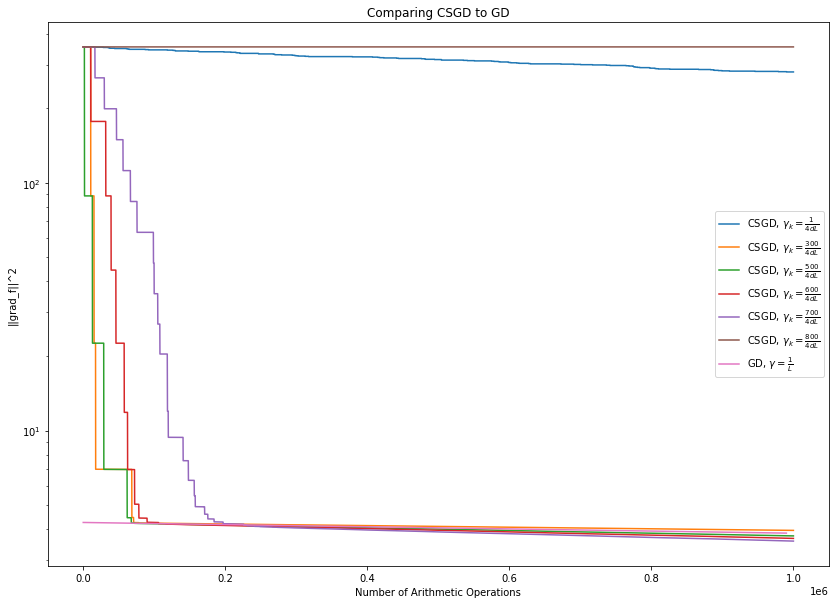

In [6]:
opt.plot_graphs(x, y, "Number of Arithmetic Operations", label, "Comparing CSGD to GD", logscale = True, criteria_type = "||grad_f||^2")

### Result
Seems that CSGD with $\gamma = 700$ is better that GD, I'll use this model.

__(б)__ В координатном спуске можно брать несколько координат вместо одной. Модифицируйте координнатный спуск, исходя из этого, пробуя разное число координат $b = 1, 5, 10, 20$, а также разные способы сэмплирования: все координатны независимо или зависимо, чтобы не было повторений в батче. Постройте графики аналогичные пункту (а). Сделайте вывод.

In [7]:
#ответ
x, y, label = [], [], []

#csgd optimizing
args['c'] = 700
n_coord_arr = [1, 5, 10, 20]


for n_coord in n_coord_arr:
    #independent
    csgd_gamma_ind = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, 
                                              criterium = '||grad_f(x_k)||', args = args, 
                                              n_iter = n_iter, gamma_k = csgd_gamma_th, 
                                              csgd_activate = True, grad_f_j = opt.f_quad_grad_j,
                                             is_dependent = False, n_coord = n_coord)

    csgd_ind_points_arr, csgd_ind_differences_arr, csgd_ind_times_arr = csgd_gamma_ind.descent()
    
    operations_csgd = [i*n_coord*args['d'] for i in range(n_iter)]
    #operations_gd = [i*args['d']**2 for i in range(gd_n_iter)]
    
    x.append(operations_csgd)
    y.append(csgd_ind_differences_arr)
    label.append(r"Independent CSGD, $n_coord = %i$" % n_coord)
    
    #dependent
    csgd_gamma_dep = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, 
                                              criterium = '||grad_f(x_k)||', args = args, 
                                              n_iter = n_iter, gamma_k = csgd_gamma_th, 
                                              csgd_activate = True, grad_f_j = opt.f_quad_grad_j,
                                             is_dependent = True, n_coord = n_coord)
    
    csgd_dep_points_arr, csgd_dep_differences_arr, csgd_dep_times_arr = csgd_gamma_dep.descent()
    x.append(operations_csgd)
    y.append(csgd_dep_differences_arr)
    label.append(r"Dependent CSGD, $n_coord = %i$" % n_coord)
    
    
#gd optimizing
gd_gamma_theory = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, x_0, criterium = '||grad_f(x_k)||', 
args = args, n_iter = gd_n_iter, gamma_k = gd_gamma_th)
gd_points_arr, gd_differences_arr, gd_times_arr = gd_gamma_theory.descent()
x.append(operations_gd)
y.append(gd_differences_arr)
label.append(r"GD, $\gamma = \frac{1}{L}$")

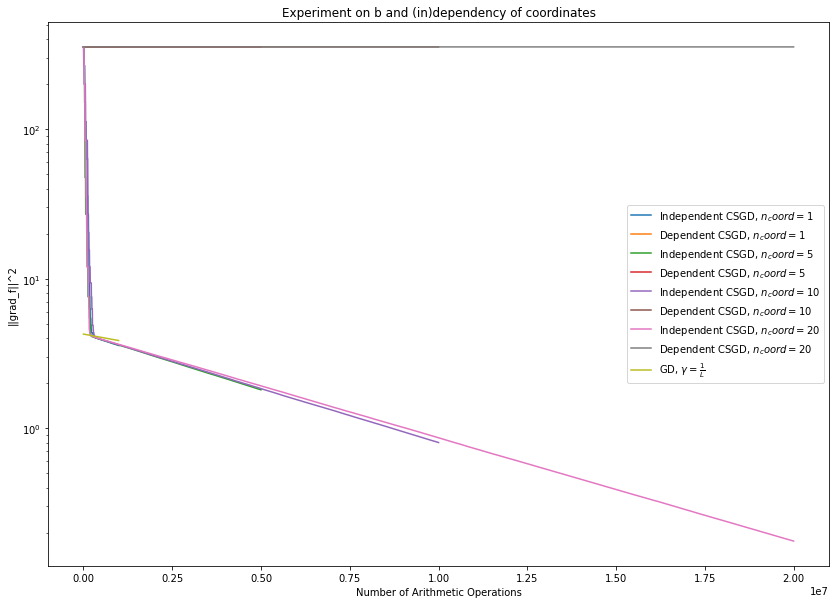

In [8]:
opt.plot_graphs(x, y, "Number of Arithmetic Operations", label, "Experiment on b and (in)dependency of coordinates",
                logscale = True, criteria_type = "||grad_f||^2")

We can see that the method works better when the number of coordinates is more, so from now on we will have $n_{coord} = 20$

## Задача 2

Рассмотрим задачу линейной регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. 

Linear regression: $\to_litmits\min_{w \in \mathbb{R}^d} f(w) := \dfrac{1}{n} \left\|Xw - y\right\|_2^2$

Also, $\nabla^2f(w) = A,$ where $A = \dfrac{2}{n} X^TX, \quad b = \dfrac{2}{n}X^Ty$

From HW1 we know that these inequalities take place: $\mu \leq \lambda_{\min}\left(A\right)$,

$L \geq \lambda_{\max}\left(A\right)$

In [9]:
#Data Preprocessing

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy.linalg
import numpy as np
from numpy import linalg

dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

args['n'], args['d'] = X.shape[0], X.shape[1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=True)

args['X'] = X_train
args['y'] = y_train
w_0 = np.random.sample(args['d'])

args['A'] = (2 / args['n']) * args['X'].T @ args['X']
args['b'] = (2 / args['n']) * args['X'].T @ args['y']

args['mu'], args['L'] = np.min(linalg.eigvals(args['A'])), np.max(linalg.eigvals(args['A']))

print(args['mu'], args['L'])

(-5.6966228822221495e-15+0j) (18.630053608679038+0j)


$\mu$ came out to be small negative ($-4.75 \cdot 10^{-15}$) due to the computational errors, so we can consider it to be 0. $L = 15.5$

__(б)__ Реализуйте координатный SGD, SEGA для задачи линейно регрессии. Каким будете брать $b$? Как будете выбирать шаг и другие параметры методов?

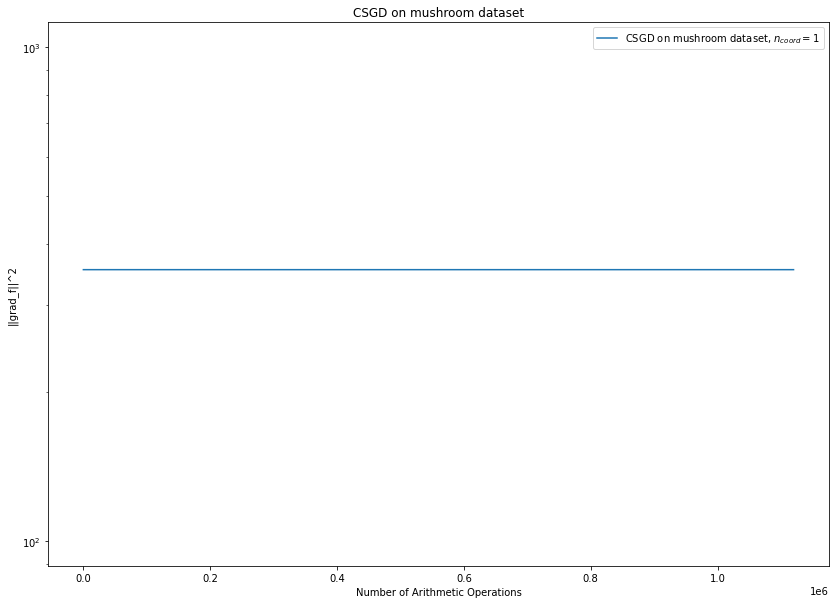

In [18]:
x, y, label = [], [], []
n_iter = 10000

def gamma_csgd(k, func, nabla_f, x_curr, x_sol, args):
    return 700/(4 * args['L'] * args['d'])

csgd = opt.GradientOptimizer(opt.f_quad, opt.f_quad_grad, gamma_k = gamma_csgd, 
                            criterium = '||grad_f||^2', eps = 10e-10,
                            x_0 = w_0, args = args, csgd_activate = True, 
                            n_coord = 1,
                            grad_f_j = opt.f_quad_grad_j, is_dependent = False)

csgd_points_arr, csgd_differences_arr, csgd_times_arr = csgd.descent()

operations_csgd = [i*csgd.n_coord*args['d'] for i in range(n_iter)]

x.append(operations_csgd)
y.append(csgd_dep_differences_arr)
label.append(r"CSGD on mushroom dataset, $n_{coord} = %i$" % csgd.n_coord)

opt.plot_graphs(x, y, "Number of Arithmetic Operations", label, "CSGD on mushroom dataset", logscale = True, criteria_type = "||grad_f||^2")

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество арифметических операций, по оси $y$ - $\|\nabla f(x^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

In [11]:
#ответ

__Бонусные пункты__

__(г)__ Попробуйте объеденить подходы SAGA/SVRG/L-SVRG и координатный SGD/SEGA (т.е. могут получиться пары SAGA + координатный, SVRG + SEGA и еще четыре других). Вам достаточно выбрать одну пару. Как при этом будет выглядеть итерация метода (запишите в явном виде)? Докажите сходимость данного подхода для $\mu$-сильно выпуклой $f$ и $L$-гладкой $f_i$.

In [12]:
#ответ

__(д)__ Реализуйте новый метод. Сравните его с двумя методами, которые были взяты за базу, на задаче линейной регресии. Способы сравнения методов придумайте самостоятельно. Сделайте вывод.

In [13]:
#ответ